In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


In [2]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve


In [47]:
actual_data = [random.randint(0,1) for i in range(20)]
predicted_data = actual_data[0:8] + [1,0,0,1] + actual_data[12:]
print("Actual Data    : ", actual_data)
print("Predicted Data : ", predicted_data)  



Actual Data    :  [0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]
Predicted Data :  [0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0]


In [48]:
tn, fp, fn, tp = confusion_matrix(actual_data, predicted_data).ravel()
print(tp, tn, fn, fn)

10 8 1 1


In [49]:
def accuracy(tp, fp, fn, tn):
    return (tp+tn)/(tp+tn+fp+fn)

def precision(tp, fp):
    return (tp)/(tp+fp)

def recall(tp, fn):
    return (tp)/(tp+fn)

def f1(tp, fp, fn, tn):
    pre = precision(tp, fp)
    rec = recall(tp, fn)
    return (2*pre*rec / (pre+rec))


In [50]:
cm = confusion_matrix(actual_data, predicted_data)

<Axes: >

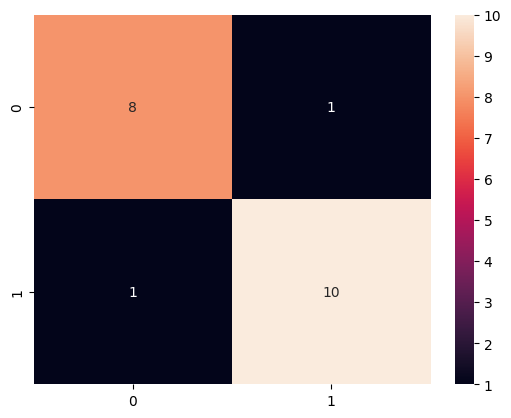

In [51]:
sns.heatmap(cm, annot=True)

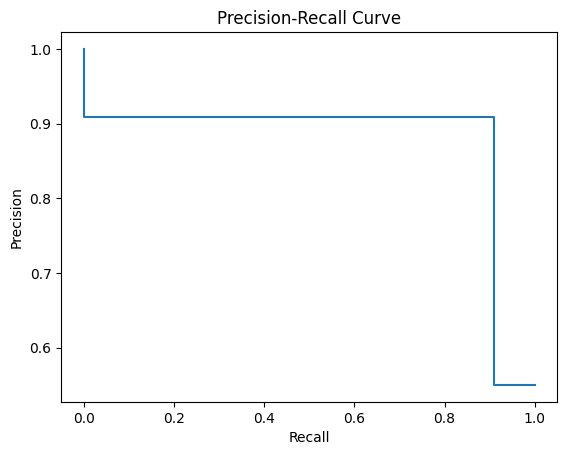

In [61]:


precision_curve, recall_curve, _ = precision_recall_curve(actual_data, predicted_data)
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()



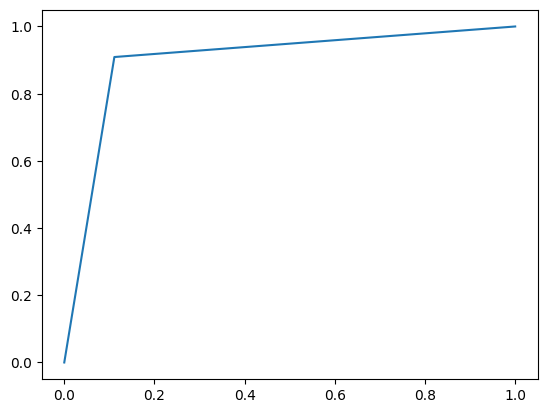

In [62]:
fpr, tpr, _ = roc_curve(actual_data, predicted_data)
plt.plot(fpr, tpr)